### Performance of your model
▪ Precision, Recall, Accuracy, AUC
▪ Loss avoided by each model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
Data= pd.read_excel("Win_prediction_data.xlsx")
Data

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


#### Shape of the data

In [3]:
print("The shape of the dataset is : ", Data.shape)

The shape of the dataset is :  (10061, 9)


In [4]:
Data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


#### Converting 1st letter of every string in Upper case. 

In [5]:
for i in Data.columns :
    if Data[i].dtype == object :
        Data[i] = Data[i].str.capitalize()
Data.head(5)    

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta zutshi,Gopa trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta zutshi,Gopa trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta zutshi,Russell dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta zutshi,Russell dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta zutshi,Russell dahlen,80882.35,Lost


#### Checking the unique value of each feature.

In [6]:
dict = {}
for i in list(Data.columns):
    dict[i] = Data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Client Category,41
Solution Type,67
Deal Date,2555
Sector,25
Location,13
VP Name,43
Manager Name,278
Deal Cost,1469
Deal Status Code,2


#### Checking of Null values in each feature

In [7]:
Data.isna().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

#### Finding and removing duplicate rows

In [8]:
Data.drop_duplicates(inplace=True)
Data.info()
#original rows(10061)-after removing duplicate(10047)
#14 duplicated values have been removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10047 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9968 non-null   object        
 1   Solution Type     10047 non-null  object        
 2   Deal Date         10047 non-null  datetime64[ns]
 3   Sector            10047 non-null  object        
 4   Location          10047 non-null  object        
 5   VP Name           10047 non-null  object        
 6   Manager Name      10047 non-null  object        
 7   Deal Cost         10047 non-null  float64       
 8   Deal Status Code  10047 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 784.9+ KB


In [9]:
Data.isna().sum()  #after removing duplicate rows.

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

## Univariate analysis

In [10]:
display(Data.columns)
print(Data.groupby("Client Category")['Client Category'].value_counts())
Data["Client Category"].unique()

# There is a duplicacy in Client Category. It seems typing error in Energy category

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code'],
      dtype='object')

Client Category        Client Category      
Airpline               Airpline                   27
Automobiles            Automobiles               178
Consulting             Consulting                352
Consumer good          Consumer good             185
Domestic bank          Domestic bank             134
Domestic private bank  Domestic private bank     261
Domestic public bank   Domestic public bank      418
E-commerce             E-commerce                 32
Electronics            Electronics                81
Energy                 Energy                     57
Energy                 Energy                     37
Finance                Finance                   339
Govt                   Govt                      120
Govt bank special      Govt bank special          41
Healthcare             Healthcare                 99
Holding                Holding                    25
Hospitality            Hospitality               119
Industries             Industries                 66
I

array(['Telecom', 'Internal', 'Govt', 'Consumer good',
       'International bank', 'Domestic public bank', 'Finance',
       'Manufacturing', 'Services_based', 'Research development',
       'Others', 'Hospitality', 'Consulting', 'Retail_market', 'Energy ',
       'Domestic private bank', 'Industries', 'Tech', 'Healthcare',
       'Electronics', 'Domestic bank', 'Automobiles', 'Medical ',
       'Infrastructure', 'Pharma', 'Power ind', 'Holding', 'Logistics',
       'Insurance', 'Payment', 'Energy', 'Govt bank special',
       'Management', 'Media_journal', 'International org', 'Real estate',
       nan, 'Tax_audit', 'Share_market', 'Knowledge', 'Airpline',
       'E-commerce'], dtype=object)

In [11]:
# Altering the error
Data["Client Category"]=np.where((Data["Client Category"]=='Energy '),'Energy',Data["Client Category"])

In [12]:
Data[Data['Client Category'].isnull()]['Location'].unique()

array(['L10'], dtype=object)

In [13]:
Data[Data['Location']=='L10']['Client Category'].nunique()

38

In [14]:
def client(cols):
    a= cols[0]
    b= cols[1]
    c= ['Sector 12', 'Sector 19', 'Sector 23', 'Sector 24', 'Sector 3',
       'Sector 5', 'Sector 6', 'Sector 15', 'Sector 20']
    d= ['Solution 7', 'Solution 10', 'Solution 37', 'Solution 31',
       'Solution 67', 'Solution 32', 'Solution 6', 'Solution 39',
       'Solution 28', 'Solution 12', 'Solution 4', 'Solution 29',
       'Solution 8', 'Solution 42', 'Solution 38', 'Solution 9',
       'Solution 14']
    if pd.isnull(a):
        if b == "L10":
            for i in c:
                for j in d:
                    return Data['Client Category'][(Data["Sector"]==i)&(Data['Solution Type']==j)].mode()[0] 
    else:
        return a

In [15]:
Data['Client Category'] = Data[['Client Category','Location']].apply(client,axis=1)

In [16]:
Data['Client Category'].isna().sum()

0

In [17]:
 Data['Wrangled Category']= Data['Client Category']

In [18]:
 Data['Wrangled Category']= Data['Wrangled Category'].map({'Telecom':"Service", 'Govt':"Miscellineous", 
                            'Consumer good':"Market",'Internal':"Organitional",'International bank':"Banking", 
                            'Domestic public bank':"Banking", 'Finance':"Service",'Manufacturing':"Organitional",
                            'Services_based':"Service",'Research development':"Organitional",'Others':"Miscellineous", 
                            'Hospitality':"Service", 'Consulting':"Service", 'Retail_market':"Market", 'Energy':"Source",
    'Domestic private bank':"Banking", 'Industries':"Growth", 'Tech':"Technology", 'Healthcare':"Health",
    'Electronics':"Technology", 'Domestic bank':"Banking",'Automobiles':"Commute", 'Medical ':"Health", 
    'Infrastructure':"Growth", 'Pharma':"Health", 'Power ind':"Source", 'Holding':"Organitional", 
    'Logistics':"Organitional",'Insurance':"Service", 'Payment':"Service", 'Govt bank special':"Banking",
    'Management':"Service", 'Media_journal':"Education", 'International org':"Miscellineous",'Real estate':"Growth",
    'Tax_audit':"Service",'Share_market':"Market",'Knowledge':"Education",'Airpline':"Commute",'E-commerce':"Market"})

In [19]:
Data[Data['Deal Cost']==0]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Wrangled Category
79,Govt,Solution 37,2011-11-20,Sector 12,L5,Ekta zutshi,Shafibul,0.0,Lost,Miscellineous
95,Others,Solution 31,2011-11-07,Sector 16,L5,Rosanna maynez,Ankita aggarwal,0.0,Lost,Miscellineous
139,Govt,Solution 37,2012-02-06,Sector 12,L5,Ekta zutshi,Shafibul,0.0,Lost,Miscellineous
150,Others,Solution 31,2012-03-23,Sector 16,L5,Rosanna maynez,Ankita aggarwal,0.0,Lost,Miscellineous
210,Domestic public bank,Solution 59,2012-06-12,Sector 2,L10,Mervin harwood,Lino batterton,0.0,Lost,Banking
...,...,...,...,...,...,...,...,...,...,...
7886,Retail_market,Solution 9,2014-11-24,Sector 23,L10,Mangesh k. singh,Fredricka bald,0.0,Lost,Market
7903,Tech,Solution 9,2015-05-31,Sector 2,L10,Rosanna maynez,Fredricka bald,0.0,Lost,Technology
7907,Tech,Solution 9,2014-12-21,Sector 2,L10,Rosanna maynez,Fredricka bald,0.0,Lost,Technology
7921,Retail_market,Solution 9,2014-12-21,Sector 23,L10,Mangesh k. singh,Fredricka bald,0.0,Lost,Market


In [20]:
Data['Deal Status Code']=Data['Deal Status Code'].map({"Won":int(1),"Lost":int(0)})

In [21]:
def Deal(x,y,u,v):
    a,b,d,e=[x],[y],[u],[v]
    for m in a:
        if (m<=1):
            for i in b:
                for k in d:
                    for l in e:
                            return np.mean(Data['Deal Cost'][(Data["Wrangled Category"]==str(i))
                                                             &(Data['VP Name']==str(k))&(Data["Deal Status Code"]==int(l))]) 
        else:
            return x

In [22]:
Data['Deal Cost']=Data[['Deal Cost','Wrangled Category','VP Name','Deal Status Code']].apply(lambda x : Deal(*x), axis=1)

In [23]:
Data[Data["Deal Cost"]<1]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Wrangled Category


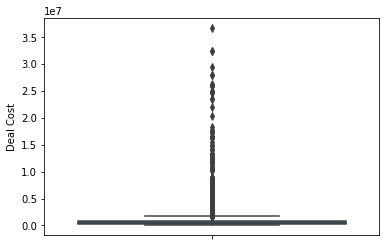

In [24]:
import seaborn as sns
sns.boxplot(y="Deal Cost", data=Data);

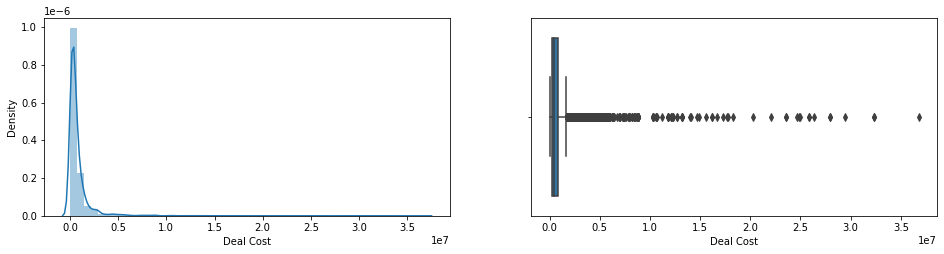

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(Data["Deal Cost"])
plt.subplot(2,2,2)
sns.boxplot(Data["Deal Cost"])
plt.show()

In [26]:
Data['Wrangled Category'].unique()

array(['Service', 'Organitional', 'Miscellineous', 'Market', 'Banking',
       'Source', 'Growth', 'Technology', 'Health', 'Commute', 'Education'],
      dtype=object)

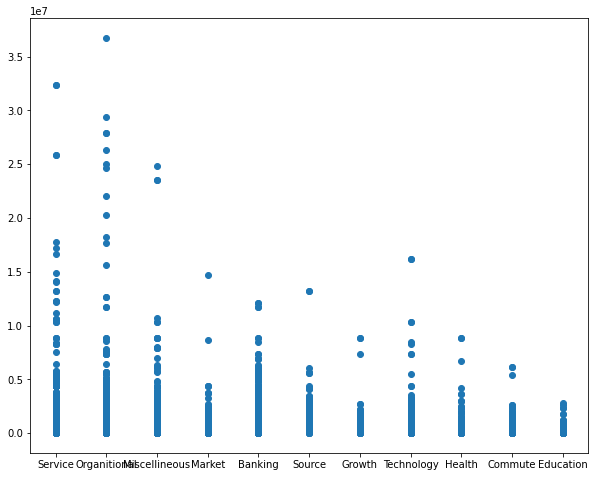

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(x=Data['Wrangled Category'],y=Data["Deal Cost"])
plt.show()

<AxesSubplot:xlabel='Wrangled Category', ylabel='Deal Cost'>

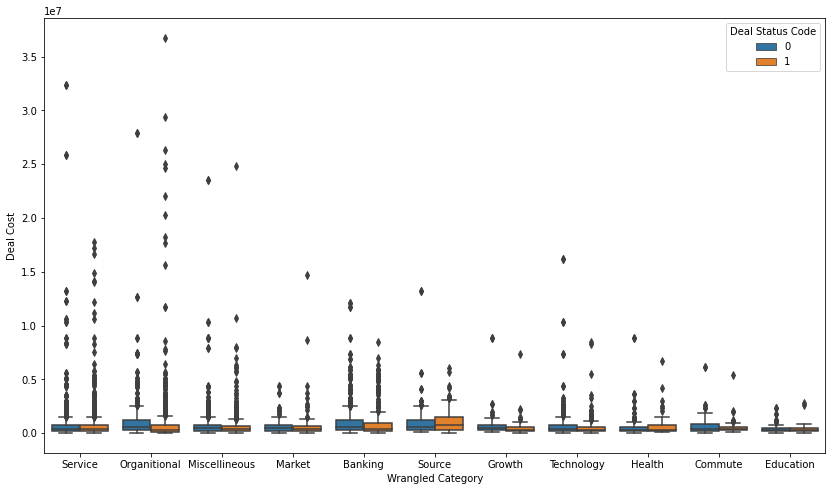

In [29]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Wrangled Category', y="Deal Cost",hue="Deal Status Code", data=Data)

In [30]:
for i in Data['Wrangled Category'].unique():
    for l in range(0,2):
    # Treating outliers in Deal Cost column
        percentiles = Data['Deal Cost'][(Data['Wrangled Category']==str(i))&(Data["Deal Status Code"]==int(l))].quantile([0.01
                                                                                                                ,0.99]).values
        #IQR
        Q1 = np.percentile( Data['Deal Cost'][(Data['Wrangled Category']==str(i))&(Data["Deal Status Code"]==int(l))], 25, 
                       interpolation = 'linear') 

        Q3 = np.percentile( Data['Deal Cost'][(Data['Wrangled Category']==str(i))&(Data["Deal Status Code"]==int(l))],75,
                       interpolation = 'linear') 
        IQR = Q3 - Q1 

    #creating upper and lower variables column wise

        Outlier_lower=(Q1-1.5*IQR)
        Outlier_upper=(Q3+1.5*IQR)
    # #treatment
        Data['Deal Cost'][(Data['Wrangled Category']==str(i))&(Data["Deal Status Code"]==int(l))]=np.where(
                     Data['Deal Cost'][(Data['Wrangled Category']==str(i))&(Data["Deal Status Code"]==int(l))]>= (Q3+1.5*IQR),
                     Outlier_upper,Data['Deal Cost'][(Data['Wrangled Category']==str(i))&(Data["Deal Status Code"]==int(l))])
        Data['Deal Cost'][(Data['Wrangled Category']==str(i))&(Data["Deal Status Code"]==int(l))]=np.where(
                     Data['Deal Cost'][(Data['Wrangled Category']==str(i))&(Data["Deal Status Code"]==int(l))]<= (Q1-1.5*IQR),
                     Outlier_lower,Data['Deal Cost'][(Data['Wrangled Category']==str(i))&(Data["Deal Status Code"]==int(l))])    

<AxesSubplot:xlabel='Wrangled Category', ylabel='Deal Cost'>

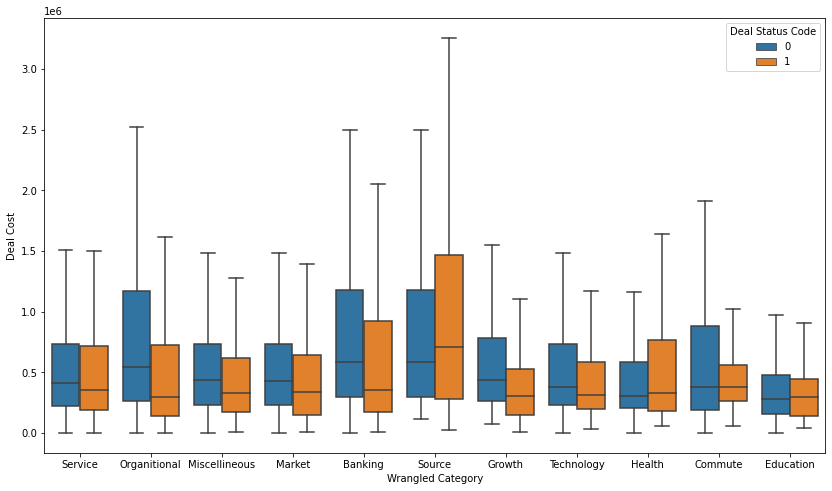

In [31]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Wrangled Category', y="Deal Cost",hue="Deal Status Code", data=Data)

### Feature Engineering

In [32]:
Data['Year']=Data['Deal Date'].dt.year

In [33]:
Data['Month']=Data['Deal Date'].dt.month

In [34]:
Data.head(5)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Wrangled Category,Year,Month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta zutshi,Gopa trilochana,150000.00,1,Service,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta zutshi,Gopa trilochana,744705.88,1,Service,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta zutshi,Russell dahlen,60000.00,0,Organitional,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta zutshi,Russell dahlen,60000.00,0,Organitional,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta zutshi,Russell dahlen,80882.35,0,Organitional,2011,6


In [35]:
Data.shape

(10047, 12)

In [36]:
Data.isna().sum()

Client Category      0
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
Wrangled Category    0
Year                 0
Month                0
dtype: int64

In [37]:
Data.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code',
       'Wrangled Category', 'Year', 'Month'],
      dtype='object')

In [38]:
Data['VP Name'].nunique()

43

In [39]:
Data['VP Name']=Data['VP Name'].str.replace(r'\xa0', ' ')

In [40]:
Data['VP Name'].unique()

array(['Ekta zutshi', 'Mervin harwood', 'Sargar deep rao', 'Lilli storrs',
       'Long bergstrom', 'Rosanna maynez', 'Mangesh k. singh',
       'Brendon wycoff', 'Neeraj kumar', 'Rahul bajpai',
       'Son mcconnaughy', 'Saurabh singh', 'Rudraksh sharma',
       'Hardeep suksma', 'Varsha arora', 'Som dutt', 'Ankita aggarwal',
       'Clinton mani', 'Marcella mo', 'Dennis faux', 'Earline langton',
       'Russell dahlen', 'Gopa trilochana', 'Kamelesh srinivasan',
       'Gaurav sameria', 'Manpreet singh', 'Man suddeth', 'Molly eakes',
       'Vidur hukle', 'Gayle molter', 'Alam syed', 'Rahul kocher',
       'Vikram rawat', 'Jewell tunstall', 'Jitendra choudhary',
       'Mayank mewar', 'Kirk hofmeister', 'P. somya', 'Prashant rawat',
       'Visvajeet das', 'Waylon mulder', 'Sarthak batra', 'Md. afsar'],
      dtype=object)

In [41]:
Data['Manager Name']=Data['Manager Name'].str.replace(r'\xa0', ' ')

In [42]:
Data['Manager Name'].unique()

array(['Gopa trilochana', 'Russell dahlen', 'Rahul sharma', 'Vidur hukle',
       'Md. daud', 'Hardeep suksma', 'Luv malhotra', 'Lino batterton',
       'Sang ingle', 'Shafibul', 'Anand s. pandey', 'Molly eakes',
       'Prateek dhotre', 'Roopal singh', 'Desmond krout',
       'Jean sappington', 'Mangesh k. singh', 'Abhinav warrier',
       'Saurabh singh', 'Tanuj bindra', 'Nahar singh', 'D. ankit ',
       'Muoi queener', 'Ayusha gupta', 'Rudraksh sharma', 'Ekta zutshi',
       'Fredricka bald', 'Ganesh malwar', 'Kamelesh srinivasan',
       'Jewell tunstall', 'Ankita aggarwal', 'Somnath mukherji',
       'Tafeeq khan', 'Rosana yokum', 'Gaurav sameria', 'Rahul bajpai',
       'Dennis faux', 'Theron rex', 'Shobhit gupta', 'Marcella mo',
       'Rahul kocher', 'Akshay sharma', 'Ram kumar', 'Sanchita gulati',
       'Mohd shakib', 'Anoop jatley', 'Ralph bohon', 'Mohd khairul',
       'Akshansh goel', 'Rajneesh tanwar', 'Manpreet singh',
       'Chanchal sharma', 'Vinay kumar', 'Elenor ha

In [43]:
Data['Manager Name'].nunique()

278

In [44]:
dataset = pd.DataFrame({ "Deal Date":Data["Deal Date"],"Client Category":Data["Wrangled Category"],
                        "Solution Type":Data["Solution Type"],"Sector":Data["Sector"],
                        "Location":Data["Location"],"VP Name":Data["VP Name"],"Manager Name":Data["Manager Name"],
                        "Deal Cost":Data["Deal Cost"],"Deal Status Code":Data["Deal Status Code"]})
dataset.to_excel("capstone1.xlsx", index=False)

In [45]:
# creating dummies
Data = pd.get_dummies(Data, columns = ['Wrangled Category', 'Solution Type', 'Sector', 'Location',
       'VP Name', 'Manager Name'],drop_first=True)

In [46]:
Data.head(1)

,Client Category,Deal Date,Deal Cost,Deal Status Code,Year,Month,Wrangled Category_Commute,Wrangled Category_Education,Wrangled Category_Growth,Wrangled Category_Health,...,Manager Name_Vikrant saini,Manager Name_Vikrant soneja,Manager Name_Vinay kumar,Manager Name_Vincenzo mushrush,Manager Name_Vinit katariya,Manager Name_Virak kandpal,Manager Name_Vishvajeet kumar,Manager Name_Waseem khan,Manager Name_Zachary oconner,Manager Name_Zulema perrine
0,Telecom,2012-03-27,150000.0,1,2012,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#### model building

In [48]:
## logistic algorithm

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data.drop(['Deal Date','Client Category'],axis=1)
                                                    ,Data['Deal Status Code'], test_size=0.30, 
                                                    random_state=1993)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [49]:
predictions = logmodel.predict(X_test)

In [50]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,f1_score, confusion_matrix

In [51]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1902
           1       0.00      0.00      0.00      1113

    accuracy                           0.63      3015
   macro avg       0.32      0.50      0.39      3015
weighted avg       0.40      0.63      0.49      3015



In [52]:
metrics.confusion_matrix(y_test,predictions)

array([[1902,    0],
       [1113,    0]], dtype=int64)

In [53]:
z=logmodel.predict(X_train)
print(classification_report(y_train,z))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77      4390
           1       0.00      0.00      0.00      2642

    accuracy                           0.62      7032
   macro avg       0.31      0.50      0.38      7032
weighted avg       0.39      0.62      0.48      7032



In [54]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

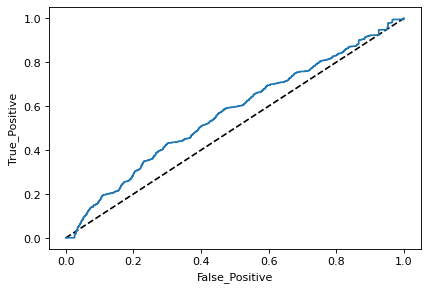

In [55]:
from matplotlib.pyplot import figure
figure(figsize=(6,4), dpi=80)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
prob=logmodel.predict_proba(X_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve (y_train, prob) 
plt.plot([0,1],[0,1], 'k--') 
plt.plot(fpr, tpr, label='Logistic Regression') 
plt.xlabel('False_Positive') 
plt.ylabel("True_Positive") 
plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV

In [93]:
##RAndom forest

In [94]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

forest = RandomForestClassifier(criterion='gini',random_state=0)

forest.fit(X_train, y_train)
param_grid = {'max_depth': [2,3,4] , 
              'max_features': ['auto','sqrt'],
              'n_estimators': [100,150,200,250,300,350]}
grid2 = GridSearchCV(forest,
                    param_grid,
                    verbose=5,
                    cv = 6,scoring="accuracy")


In [95]:
grid2.fit(X_train,y_train)

Fitting 6 folds for each of 36 candidates, totalling 216 fits
[CV 1/6] END max_depth=2, max_features=auto, n_estimators=100; total time=   0.3s
[CV 2/6] END max_depth=2, max_features=auto, n_estimators=100; total time=   0.3s
[CV 3/6] END max_depth=2, max_features=auto, n_estimators=100; total time=   0.3s
[CV 4/6] END max_depth=2, max_features=auto, n_estimators=100; total time=   0.3s
[CV 5/6] END max_depth=2, max_features=auto, n_estimators=100; total time=   0.3s
[CV 6/6] END max_depth=2, max_features=auto, n_estimators=100; total time=   0.3s
[CV 1/6] END max_depth=2, max_features=auto, n_estimators=150; total time=   0.4s
[CV 2/6] END max_depth=2, max_features=auto, n_estimators=150; total time=   0.4s
[CV 3/6] END max_depth=2, max_features=auto, n_estimators=150; total time=   0.4s
[CV 4/6] END max_depth=2, max_features=auto, n_estimators=150; total time=   0.4s
[CV 5/6] END max_depth=2, max_features=auto, n_estimators=150; total time=   0.4s
[CV 6/6] END max_depth=2, max_featur

[CV 5/6] END max_depth=3, max_features=auto, n_estimators=300; total time=   1.0s
[CV 6/6] END max_depth=3, max_features=auto, n_estimators=300; total time=   1.0s
[CV 1/6] END max_depth=3, max_features=auto, n_estimators=350; total time=   1.2s
[CV 2/6] END max_depth=3, max_features=auto, n_estimators=350; total time=   1.3s
[CV 3/6] END max_depth=3, max_features=auto, n_estimators=350; total time=   1.2s
[CV 4/6] END max_depth=3, max_features=auto, n_estimators=350; total time=   1.2s
[CV 5/6] END max_depth=3, max_features=auto, n_estimators=350; total time=   1.2s
[CV 6/6] END max_depth=3, max_features=auto, n_estimators=350; total time=   1.2s
[CV 1/6] END max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV 2/6] END max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV 3/6] END max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV 4/6] END max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV 5/6] END max

[CV 3/6] END max_depth=4, max_features=sqrt, n_estimators=250; total time=   0.9s
[CV 4/6] END max_depth=4, max_features=sqrt, n_estimators=250; total time=   0.9s
[CV 5/6] END max_depth=4, max_features=sqrt, n_estimators=250; total time=   0.9s
[CV 6/6] END max_depth=4, max_features=sqrt, n_estimators=250; total time=   0.9s
[CV 1/6] END max_depth=4, max_features=sqrt, n_estimators=300; total time=   1.1s
[CV 2/6] END max_depth=4, max_features=sqrt, n_estimators=300; total time=   1.2s
[CV 3/6] END max_depth=4, max_features=sqrt, n_estimators=300; total time=   1.1s
[CV 4/6] END max_depth=4, max_features=sqrt, n_estimators=300; total time=   1.1s
[CV 5/6] END max_depth=4, max_features=sqrt, n_estimators=300; total time=   1.1s
[CV 6/6] END max_depth=4, max_features=sqrt, n_estimators=300; total time=   1.1s
[CV 1/6] END max_depth=4, max_features=sqrt, n_estimators=350; total time=   1.3s
[CV 2/6] END max_depth=4, max_features=sqrt, n_estimators=350; total time=   1.3s
[CV 3/6] END max

GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             scoring='accuracy', verbose=5)

In [96]:
display(grid2.best_params_,grid2.best_score_ )

{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}

0.7568259385665529

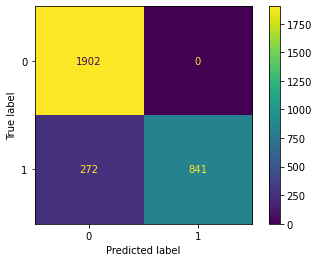

In [97]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid2, X_test, y_test);

In [98]:
Rf_prediction = grid2.predict(X_test)
print(classification_report(y_test,Rf_prediction))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1902
           1       1.00      0.76      0.86      1113

    accuracy                           0.91      3015
   macro avg       0.94      0.88      0.90      3015
weighted avg       0.92      0.91      0.91      3015



In [99]:
x=grid2.predict(X_train)
print(classification_report(y_train,x))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4390
           1       1.00      0.77      0.87      2642

    accuracy                           0.92      7032
   macro avg       0.94      0.89      0.90      7032
weighted avg       0.93      0.92      0.91      7032



In [100]:
#### auc  in roc 

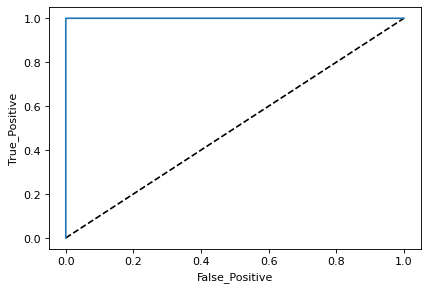

In [101]:
figure(figsize=(6,4), dpi=80)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid2.predict_proba(X_test)[:,1])
prob1=grid2.predict_proba(X_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve (y_train, prob1 ) 
plt.plot([0,1],[0,1], 'k--') 
plt.plot(fpr, tpr, label='Rf') 
plt.xlabel('False_Positive') 
plt.ylabel("True_Positive") 
plt.show()

In [ ]:
## shows high accuracy and perfect graph

In [599]:
###KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
clf=KNeighborsClassifier()
param_grid = {'n_neighbors': [8,9,11,13,15],
             'algorithm':['auto','ball_tree', 'kd_tree']}
grid1 = GridSearchCV(clf,
                    param_grid,
                    verbose=5,
                    cv = 6,scoring='accuracy')

In [85]:
grid1.fit(X_train,y_train)

Fitting 6 folds for each of 15 candidates, totalling 90 fits
[CV 1/6] END ..................algorithm=auto, n_neighbors=8; total time=   0.3s
[CV 2/6] END ..................algorithm=auto, n_neighbors=8; total time=   0.3s
[CV 3/6] END ..................algorithm=auto, n_neighbors=8; total time=   0.3s
[CV 4/6] END ..................algorithm=auto, n_neighbors=8; total time=   0.3s
[CV 5/6] END ..................algorithm=auto, n_neighbors=8; total time=   0.3s
[CV 6/6] END ..................algorithm=auto, n_neighbors=8; total time=   0.3s
[CV 1/6] END ..................algorithm=auto, n_neighbors=9; total time=   0.3s
[CV 2/6] END ..................algorithm=auto, n_neighbors=9; total time=   0.3s
[CV 3/6] END ..................algorithm=auto, n_neighbors=9; total time=   0.4s
[CV 4/6] END ..................algorithm=auto, n_neighbors=9; total time=   0.3s
[CV 5/6] END ..................algorithm=auto, n_neighbors=9; total time=   0.3s
[CV 6/6] END ..................algorithm=auto, n

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [8, 9, 11, 13, 15]},
             scoring='accuracy', verbose=5)

In [86]:
display(grid1.best_params_,grid1.best_score_ )

{'algorithm': 'ball_tree', 'n_neighbors': 9}

0.7120307167235493

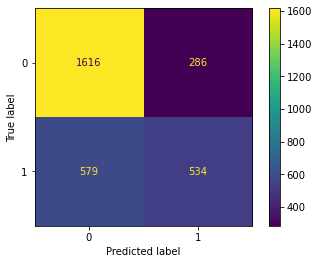

In [87]:
knn_prediction = grid1.predict(X_test)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid1, X_test, y_test);

In [88]:
print(classification_report(y_test,knn_prediction))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1902
           1       0.65      0.48      0.55      1113

    accuracy                           0.71      3015
   macro avg       0.69      0.66      0.67      3015
weighted avg       0.70      0.71      0.70      3015



In [89]:
x1=grid1.predict(X_train)
print(classification_report(y_train,x1))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      4390
           1       0.76      0.61      0.68      2642

    accuracy                           0.78      7032
   macro avg       0.78      0.75      0.76      7032
weighted avg       0.78      0.78      0.78      7032



In [90]:
## over fitted

In [91]:
## auc in roc curve

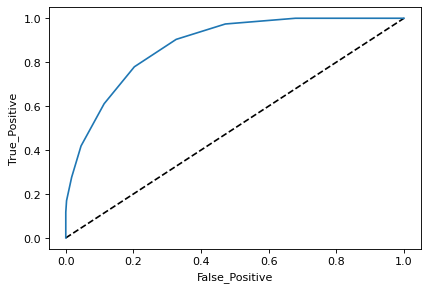

In [92]:
figure(figsize=(6, 4), dpi=80)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid1.predict_proba(X_test)[:,1])
prob2=grid1.predict_proba(X_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve (y_train, prob2 ) 
plt.plot([0,1],[0,1], 'k--') 
plt.plot(fpr, tpr, label='KNN') 
plt.xlabel('False_Positive') 
plt.ylabel("True_Positive") 
plt.show()